In [3]:
from scipy import misc, ndimage
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
image = ndimage.imread('school.jpg', mode='I')
pattern = ndimage.imread('fish1.png', mode='I')

ImportError: Could not import the Python Imaging Library (PIL) required to load image files.  Please refer to http://pillow.readthedocs.org/en/latest/installation.html for installation instructions.

In [29]:
image.shape, pattern.shape

((720, 1280), (15, 38))

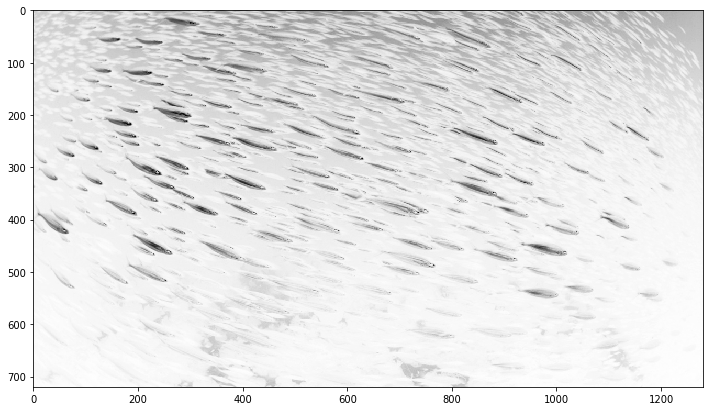

In [124]:
showImage(image, 12, 'Greys')

In [79]:
def showImage(image, size, cmap):
    plt.figure(figsize = (size, size))
    if cmap != '':
        plt.imshow(image, cmap=cmap)
    else:
        plt.imshow(image)
    plt.show()

In [32]:
def getCorrelation(im, pat):
    pat = np.rot90(pat, 2)
    fp = np.fft.fft2(pat, im.shape)
    fi = np.fft.fft2(im)
    m = np.multiply(fp, fi)
    corr = np.fft.ifft2(m)
    corr = np.abs(corr)
    return corr

In [1]:
def getCorrelation2(im, pat):
    return scipy.signal.correlate(im, pat)

In [93]:
def proccesCorrelation(cor, d):
    count = 0
    m = np.amax(cor) * d
    for row in range(cor.shape[0]):
        for col in range(cor.shape[1]):
            if (cor[row][col] < m):
                cor[row][col] = 0
    return cor

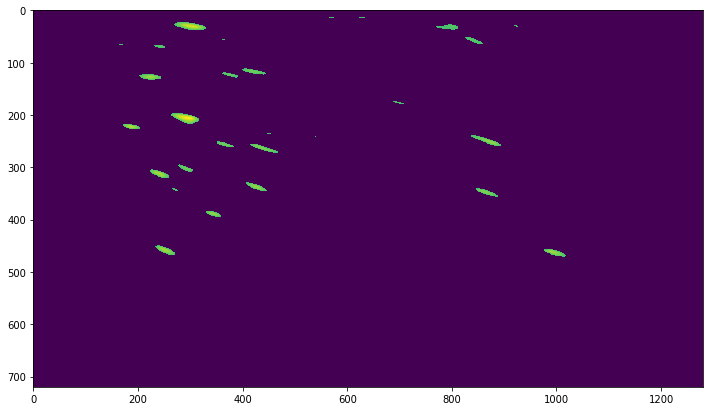

In [94]:
c = getCorrelation(image, pattern)
pc = proccesCorrelation(c, 0.7)
showImage(pc, 12, '')

In [118]:
from skimage.feature import peak_local_max
xy = peak_local_max(pc)
print(xy.shape)

(39142, 2)


## LETTERS

In [108]:
image2 = ndimage.imread('galia.png', mode='I')
pattern2 = ndimage.imread('galia_e.png', mode='I')
image2 = np.invert(image2)
pattern2 = np.invert(pattern2)

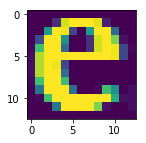

[[-256 -256 -256 -256 -256 -256 -256 -256 -256 -256 -256 -256 -256]
 [-256 -256 -256 -222  -18   -1   -1   -1  -12 -234 -256 -256 -256]
 [-256 -256 -115   -1   -7 -201 -256 -115   -1   -1 -167 -256 -256]
 [-256 -195   -1   -1 -127 -256 -256 -222  -18   -1  -51 -245 -256]
 [-251  -78   -1   -1 -167 -256 -256 -222  -18   -1   -7 -201 -251]
 [-247  -31   -1   -1   -1   -1   -1   -1   -1   -1   -7 -201 -256]
 [-247  -31   -1   -7 -201 -256 -256 -256 -256 -256 -256 -256 -256]
 [-247  -31   -1   -1 -167 -256 -256 -256 -256 -256 -256 -256 -256]
 [-251  -78   -1   -1  -81 -256 -256 -256 -256 -256 -256 -256 -256]
 [-256 -157   -1   -1   -1 -167 -256 -256 -251  -78 -127 -256 -247]
 [-256 -251  -78   -1   -1   -1   -1   -1   -1   -1  -98 -245 -247]
 [-256 -256 -256 -157   -1   -1   -1   -1  -51 -245 -256 -256 -247]
 [-256 -256 -256 -256 -256 -256 -256 -256 -256 -256 -256 -256 -256]]


In [109]:
showImage(pattern2, 2, '')
print(pattern2)

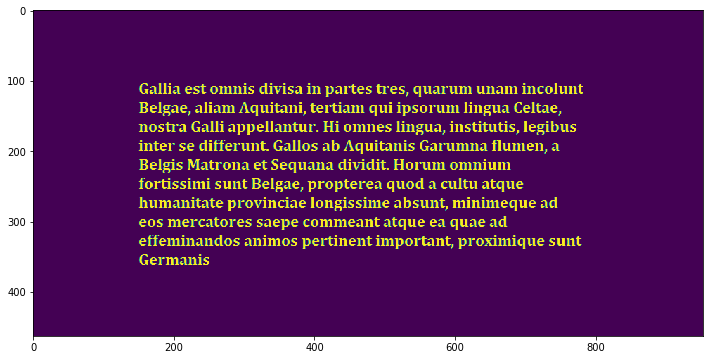

In [86]:
showImage(image2, 12, '')

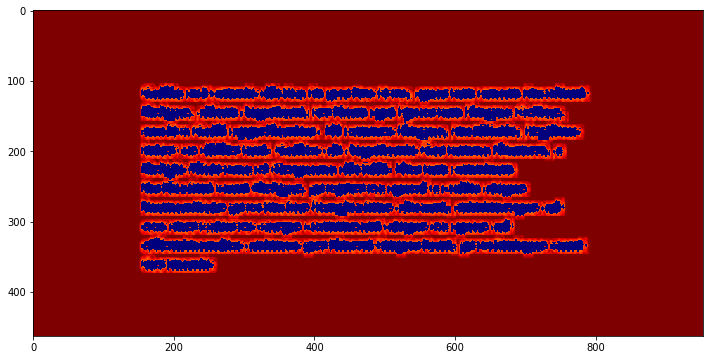

In [110]:
c = getCorrelation(image2, pattern2)
pc = proccesCorrelation(c, 0.8)
showImage(pc, 12, 'jet')